In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-customers/Churn Modeling.csv


In [2]:
df=pd.read_csv("/kaggle/input/bank-customers/Churn Modeling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.duplicated().sum()

0

In [7]:
df["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [8]:
df["Geography"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [9]:
df["Age"].value_counts()

37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: Age, Length: 70, dtype: int64

In [10]:
df["Gender"].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [11]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [12]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [14]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [15]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [16]:
from sklearn.model_selection import train_test_split
X=df.drop(columns=['Exited'])
y=df['Exited']
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42, test_size=.2)

In [17]:
X


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [18]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [19]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(X_train)
x_test_scaled=scaler.transform(X_test)

In [20]:
x_train_scaled

array([[ 0.35649971, -0.6557859 ,  0.34567966, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.20389777,  0.29493847, -0.3483691 , ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.96147213, -1.41636539, -0.69539349, ..., -0.57946723,
         1.73494238,  0.91324755],
       ...,
       [ 0.86500853, -0.08535128, -1.38944225, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.15932282,  0.3900109 ,  1.03972843, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [ 0.47065475,  1.15059039, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

In [21]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [22]:
models=[]
for i in range(1,20):
    model=Sequential()
    model.add(Dense(i,activation='relu',input_dim=11))
    model.add(Dense(i,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    models.append(model)

2022-10-19 05:44:23.181568: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [23]:
models[9].summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 10)                120       
_________________________________________________________________
dense_28 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 11        
Total params: 241
Trainable params: 241
Non-trainable params: 0
_________________________________________________________________


In [24]:
history_=[]
for model in models:
    model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
    history=model.fit(x_train_scaled,y_train,epochs=100,validation_split=0.2)
    history_.append(history)

2022-10-19 05:44:24.069905: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
200/200 [==============================] - 1s 3ms/step - loss: 0.6188 - accuracy: 0.7934 - val_loss: 0.5599 - val_accuracy: 0.7987
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.5307 - accuracy: 0.7934 - val_loss: 0.4970 - val_accuracy: 0.7987
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4967 - accuracy: 0.7934 - val_loss: 0.4779 - val_accuracy: 0.7987
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4855 - accuracy: 0.7934 - val_loss: 0.4697 - val_accuracy: 0.7987
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4792 - accuracy: 0.7934 - val_loss: 0.4639 - val_accuracy: 0.7987
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4739 - accuracy: 0.7934 - val_loss: 0.4594 - val_accuracy: 0.7987
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4690 - accuracy: 0.7934 - val_loss: 0.4548 - val_accuracy: 0.7987

In [25]:
model.layers[1].get_weights()

[array([[ 0.1860194 ,  0.18090005, -0.27540964, -0.16389112,  0.03227858,
          0.26651865,  0.53569657,  0.2603735 , -0.25308546, -0.2613331 ,
         -0.40113768, -0.07377212, -0.59485865, -0.19798252,  0.07256249,
          0.16273254,  0.24759588, -0.22710381,  0.3324152 ],
        [ 0.31220454,  0.0893738 ,  0.3530643 ,  0.18439719,  0.39415762,
          0.00916569,  0.47833744, -0.29405412, -0.07778591, -0.37057573,
         -0.5673477 , -0.38279226, -0.09282178, -0.20099093,  0.24825935,
          0.57362854, -0.98986447, -0.05338891,  0.1911412 ],
        [ 0.52295244,  0.01016274, -0.46637705, -0.04173085,  0.15553786,
         -0.6200961 , -0.23179474, -0.4927396 , -1.096798  ,  0.17186452,
         -0.06423361,  0.10471961,  0.1793056 , -0.2254294 ,  0.46895504,
          0.34788164, -1.5894063 ,  0.028808  ,  0.16821812],
        [-0.40859404,  0.46238017,  0.20631044,  0.00474041,  0.44559   ,
         -0.1645321 , -0.33244953,  0.18157984, -0.37705392,  0.28227177,


In [26]:
history_[0].history

{'loss': [0.6187649965286255,
  0.5306609869003296,
  0.49669140577316284,
  0.48553135991096497,
  0.479203999042511,
  0.4739445149898529,
  0.4689542353153229,
  0.4639718234539032,
  0.45875614881515503,
  0.4537186026573181,
  0.4490748345851898,
  0.4452650845050812,
  0.44209420680999756,
  0.43982037901878357,
  0.4376543462276459,
  0.4364529848098755,
  0.43552714586257935,
  0.4349309206008911,
  0.43445995450019836,
  0.43422040343284607,
  0.43383488059043884,
  0.4335479736328125,
  0.43350863456726074,
  0.43326979875564575,
  0.43317973613739014,
  0.43314337730407715,
  0.43295735120773315,
  0.43299856781959534,
  0.4329577684402466,
  0.4328817129135132,
  0.43281444907188416,
  0.43275532126426697,
  0.4327675998210907,
  0.4327813684940338,
  0.4327450096607208,
  0.43275710940361023,
  0.43267613649368286,
  0.4327663481235504,
  0.43261444568634033,
  0.4326590597629547,
  0.4327549636363983,
  0.4326659142971039,
  0.4327479600906372,
  0.43272674083709717,
  0.

In [27]:
for history in history_:
    best_score = max(history.history['accuracy'])
    print("best score ",best_score)

best score  0.7945312261581421
best score  0.8462499976158142
best score  0.8587499856948853
best score  0.8634374737739563
best score  0.8389062285423279
best score  0.8626562356948853
best score  0.8650000095367432
best score  0.8701562285423279
best score  0.870312511920929
best score  0.8684375286102295
best score  0.8695312738418579
best score  0.8671875
best score  0.8717187643051147
best score  0.8717187643051147
best score  0.8704687356948853
best score  0.8693749904632568
best score  0.875
best score  0.8734375238418579
best score  0.8765624761581421


In [28]:
for history in history_:
    best_score = max(history.history['val_accuracy'])
    print("best score val score",best_score)

best score val score 0.7987499833106995
best score val score 0.8493750095367432
best score val score 0.8550000190734863
best score val score 0.8637499809265137
best score val score 0.8387500047683716
best score val score 0.856249988079071
best score val score 0.8600000143051147
best score val score 0.8606250286102295
best score val score 0.8600000143051147
best score val score 0.8612499833106995
best score val score 0.8668749928474426
best score val score 0.8631250262260437
best score val score 0.8631250262260437
best score val score 0.8600000143051147
best score val score 0.859375
best score val score 0.8600000143051147
best score val score 0.8600000143051147
best score val score 0.8643749952316284
best score val score 0.8600000143051147


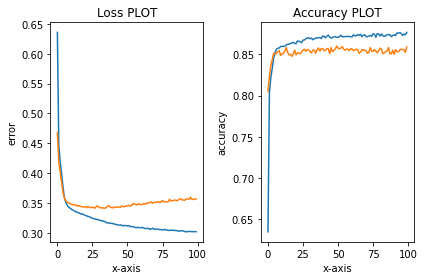

In [29]:
import matplotlib.pyplot as plt

plt.subplot(1,2,1)
plt.plot(history_[18].history['loss'])
plt.plot(history_[18].history['val_loss'])
plt.title('Loss PLOT')
plt.xlabel('x-axis')
plt.ylabel('error')

plt.subplot(1,2,2)
plt.plot(history_[18].history['accuracy'])
plt.plot(history_[18].history['val_accuracy'])
plt.title('Accuracy PLOT')
plt.xlabel('x-axis')
plt.ylabel('accuracy')
plt.tight_layout()
plt.show()


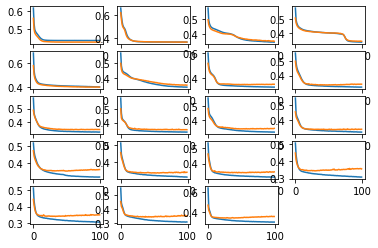

In [30]:
import matplotlib.pyplot as plt
i=1
for history in history_:
    plt.subplot(5,4,i)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    i=i+1
plt.show()